In [420]:
# CPSC415/515 Big Data Programming
# Project 3: Visualization and Prediction of heart attacks
# Group: Cody Bauer, Demyre Ramp

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

heart_analysis_file_name = "heart.csv"

In [4]:
def load_data():
    
    df = pd.read_csv(heart_analysis_file_name)
    df.columns = ["Age", "Sex", "Chest Pain", "RBP", "Chol", "FBS", "RECG", "Max Heart Rate", "EXNG", "Old Peak", "Slope", "CAA", "Thalium", "Heart Attack"]

    return df

data_uncleaned = load_data()
data_uncleaned

,Age,Sex,Chest Pain,RBP,Chol,FBS,RECG,Max Heart Rate,EXNG,Old Peak,Slope,CAA,Thalium,Heart Attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
def find_and_print_outliers(data, threshold=3):
    # Find the outliers
    numeric_columns = data.select_dtypes(include=[np.number]).columns
    z_scores = np.abs((data[numeric_columns] - data[numeric_columns].mean()) / data[numeric_columns].std())
    outliers = (z_scores > threshold).any(axis=1)
    
    # Print the rows that contain outliers
    print("Rows with outliers:")
    for index, row in data[outliers].iterrows():
        outlier_values = row[numeric_columns][z_scores.loc[index] > threshold]
        print(f"Index {index}, Outlier values: {outlier_values.to_dict()}")

    return outliers

outliers = find_and_print_outliers(data_uncleaned)

Rows with outliers:
Index 28, Outlier values: {'Chol': 417.0}
Index 48, Outlier values: {'Thalium': 0.0}
Index 85, Outlier values: {'Chol': 564.0}
Index 92, Outlier values: {'CAA': 4.0}
Index 158, Outlier values: {'CAA': 4.0}
Index 163, Outlier values: {'CAA': 4.0}
Index 164, Outlier values: {'CAA': 4.0}
Index 204, Outlier values: {'Old Peak': 6.2}
Index 220, Outlier values: {'Chol': 407.0}
Index 221, Outlier values: {'Old Peak': 5.6}
Index 223, Outlier values: {'RBP': 200.0}
Index 246, Outlier values: {'Chol': 409.0}
Index 248, Outlier values: {'RBP': 192.0}
Index 251, Outlier values: {'CAA': 4.0}
Index 272, Outlier values: {'Max Heart Rate': 71.0}
Index 281, Outlier values: {'Thalium': 0.0}


In [6]:
def clean_data_from_outliers(data, threshold=3):   
    # Remove outliers
    df_cleaned = data[~outliers].copy()

    return df_cleaned.reset_index(drop=True)

data_cleaned = clean_data_from_outliers(data_uncleaned)
data_cleaned

,Age,Sex,Chest Pain,RBP,Chol,FBS,RECG,Max Heart Rate,EXNG,Old Peak,Slope,CAA,Thalium,Heart Attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
283,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
284,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
285,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


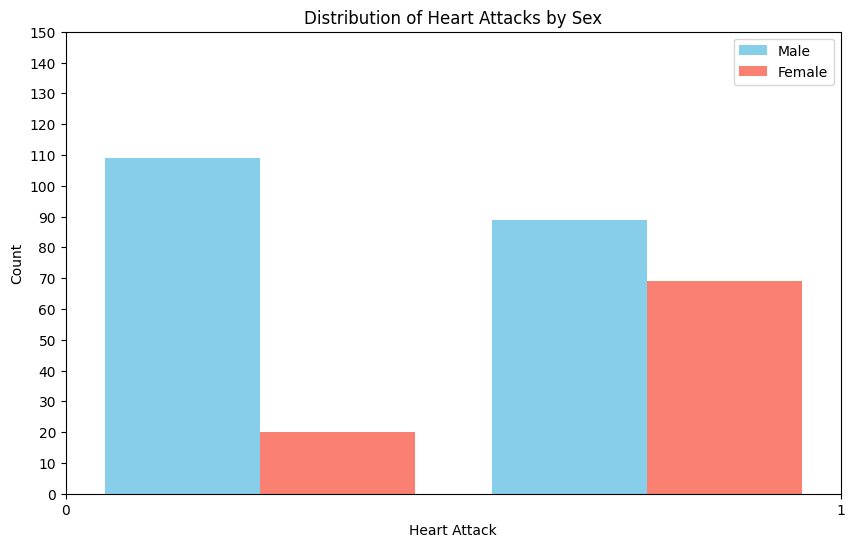

In [17]:
def plot_heart_attack_by_sex(data_cleaned):

    male_data = data_cleaned[data_cleaned['Sex'] == 1]['Heart Attack']
    female_data = data_cleaned[data_cleaned['Sex'] == 0]['Heart Attack']

    plt.figure(figsize=(10, 6))
    bins = np.array([0, 1])
    plt.hist([male_data, female_data], bins=2, label=['Male', 'Female'], color=['skyblue', 'salmon'])
    plt.xticks(ticks=[0, 1])
    max_count = max(data_cleaned['Heart Attack'].value_counts())
    plt.yticks(range(0, max_count+1, 10))
    plt.title('Distribution of Heart Attacks by Sex')
    plt.xlabel('Heart Attack')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

sorted = plot_heart_attack_by_sex(data_cleaned)
sorted


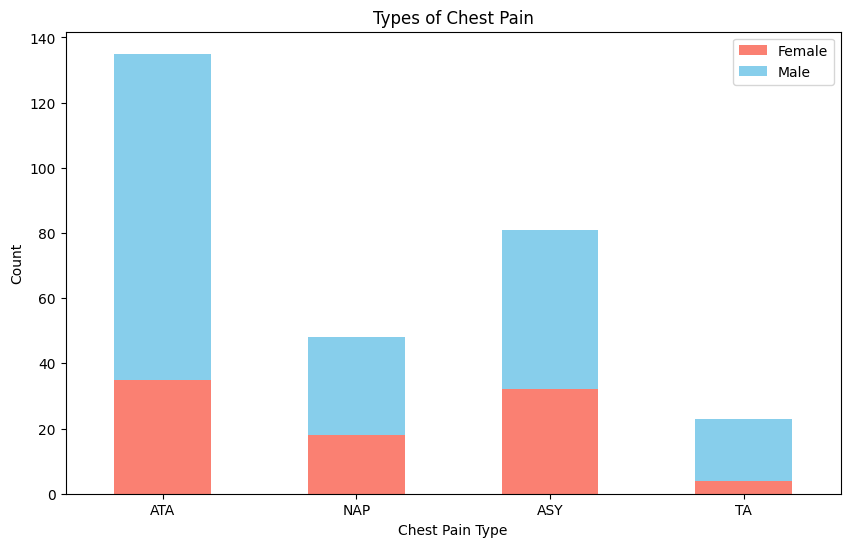

In [21]:
def plot_chest_pain_types_modified(data_cleaned):
    data_cleaned['Sex'] = data_cleaned['Sex'].replace({'Male': 1, 'Female': 0})
    counts = data_cleaned.groupby(['Chest Pain', 'Sex']).size().unstack(fill_value=0)

    ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue'])
    ax.set_title('Types of Chest Pain')
    ax.set_xlabel('Chest Pain Type')
    ax.set_ylabel('Count')
    ax.set_xticklabels(['ATA', 'NAP', 'ASY', 'TA'], rotation=0)
    ax.legend(labels=['Female', 'Male'])

    plt.show()

plot_chest_pain_types_modified(data_cleaned)


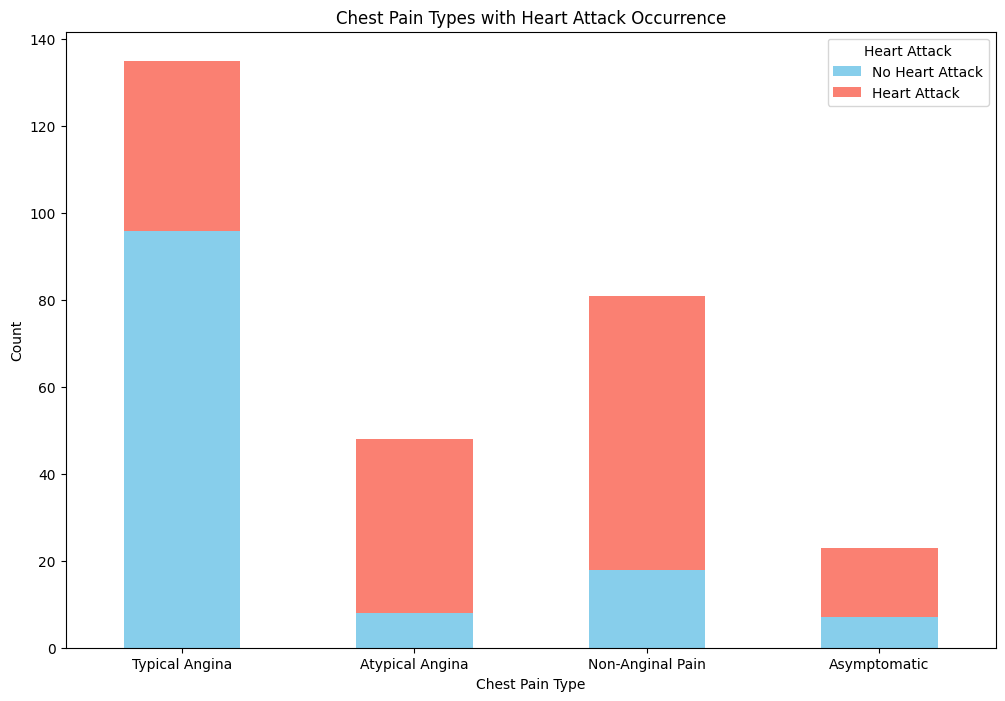

In [28]:
def plot_chest_pain_types_with_heart_attack_only(data):
    # Grouping data by Chest Pain and Heart Attack Output
    counts = data.groupby(['Chest Pain', 'Heart Attack']).size().unstack(fill_value=0)

    # Creating a stacked bar plot
    ax = counts.plot(kind='bar', stacked=True, figsize=(12, 8), color=['skyblue', 'salmon'])
    ax.set_title('Chest Pain Types with Heart Attack Occurrence')
    ax.set_xlabel('Chest Pain Type')
    ax.set_ylabel('Count')
    ax.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-Anginal Pain', 'Asymptomatic'], rotation=0)
    ax.legend(title='Heart Attack', labels=['No Heart Attack', 'Heart Attack'])

    plt.show()

# Display the modified plot
plot_chest_pain_types_with_heart_attack_only(data_cleaned)


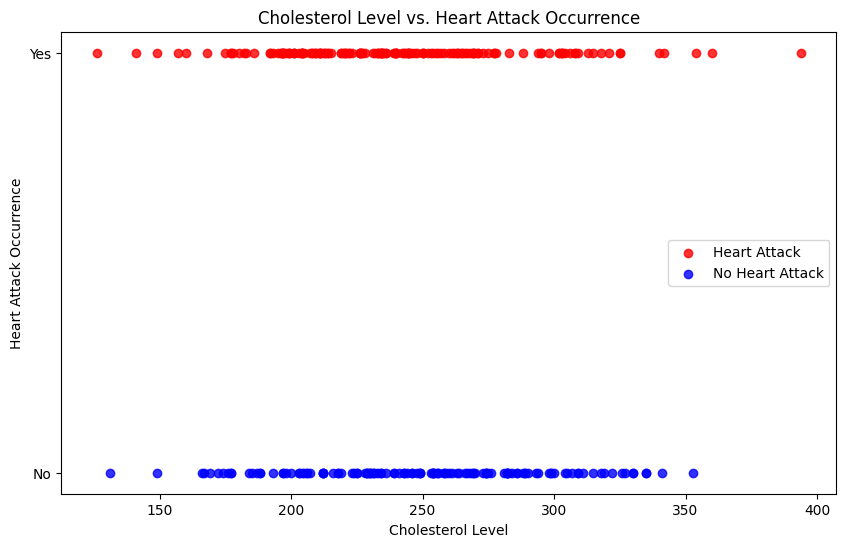

In [427]:
def visualize_cholesterol_heart_attack(df):

    heart_attack = df[df['Heart Attack'] == 1]
    no_heart_attack = df[df['Heart Attack'] == 0]

    plt.figure(figsize=(10, 6))
    plt.scatter(heart_attack['Chol'], np.ones_like(heart_attack['Chol']), alpha=0.8, c='red', label='Heart Attack')
    plt.scatter(no_heart_attack['Chol'], np.zeros_like(no_heart_attack['Chol']), alpha=0.8, c='blue', label='No Heart Attack')
    plt.xlabel('Cholesterol Level')
    plt.ylabel('Heart Attack Occurrence')
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.title('Cholesterol Level vs. Heart Attack Occurrence')
    plt.legend()
    plt.show()
    
visualize_cholesterol_heart_attack(data_cleaned)

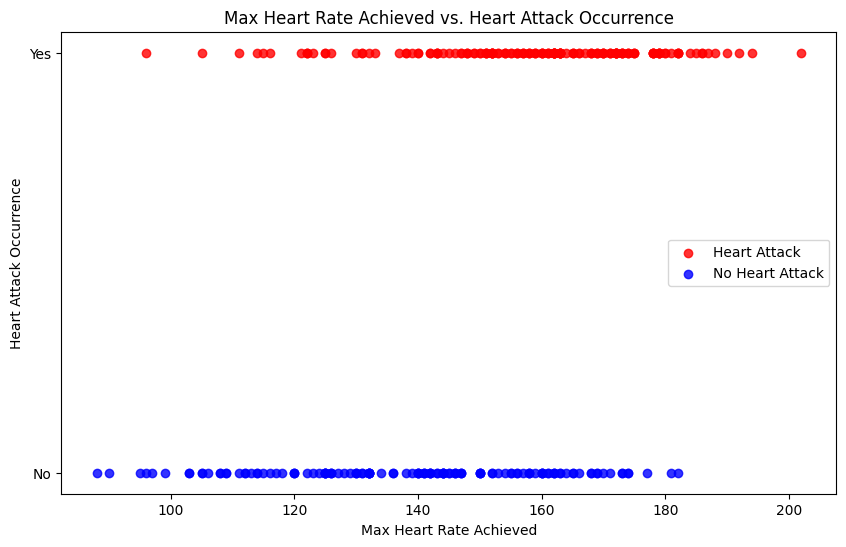

In [429]:
def visualize_max_heart_rate_heart_attack(df):

    heart_attack = df[df['Heart Attack'] == 1]
    no_heart_attack = df[df['Heart Attack'] == 0]

    plt.figure(figsize=(10, 6))
    plt.scatter(heart_attack['Max Heart Rate'], np.ones_like(heart_attack['Max Heart Rate']), alpha=0.8, c='red', label='Heart Attack')
    plt.scatter(no_heart_attack['Max Heart Rate'], np.zeros_like(no_heart_attack['Max Heart Rate']), alpha=0.8, c='blue', label='No Heart Attack')

    plt.xlabel('Max Heart Rate Achieved')
    plt.ylabel('Heart Attack Occurrence')
    plt.yticks([0, 1], ['No', 'Yes'])
    plt.title('Max Heart Rate Achieved vs. Heart Attack Occurrence')
    plt.legend()
    plt.show()
    
visualize_max_heart_rate_heart_attack(data_cleaned)

<Figure size 1000x600 with 0 Axes>

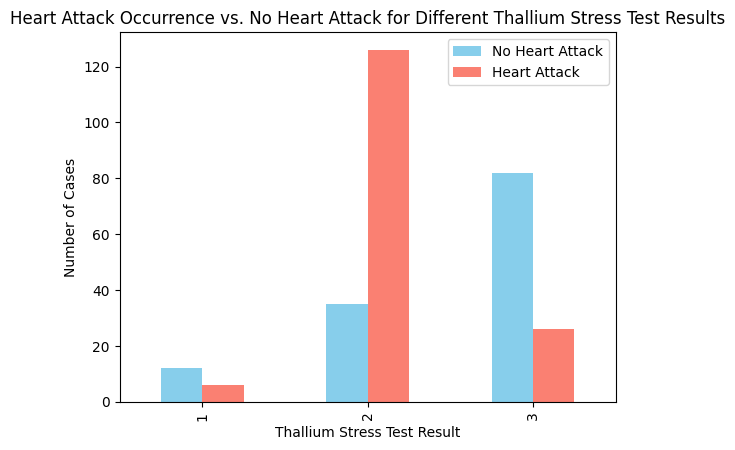

In [15]:
def visualize_thall_heart_attack_comparison(df):
    """
    Visualize the comparison between heart attack occurrence and no heart attack occurrence
    for each thallium stress test result using a bar graph.
    """
    count_data = df.groupby('Thalium')['Heart Attack'].value_counts().unstack()

    # Filling NaN values with 0
    count_data = count_data.fillna(0)

    plt.figure(figsize=(10, 6))
    count_data.plot(kind='bar', color=['skyblue', 'salmon'])

    plt.xlabel('Thallium Stress Test Result')
    plt.ylabel('Number of Cases')
    plt.title('Heart Attack Occurrence vs. No Heart Attack for Different Thallium Stress Test Results')
    plt.legend(['No Heart Attack', 'Heart Attack'])
    plt.show()
    
visualize_thall_heart_attack_comparison(data_cleaned)

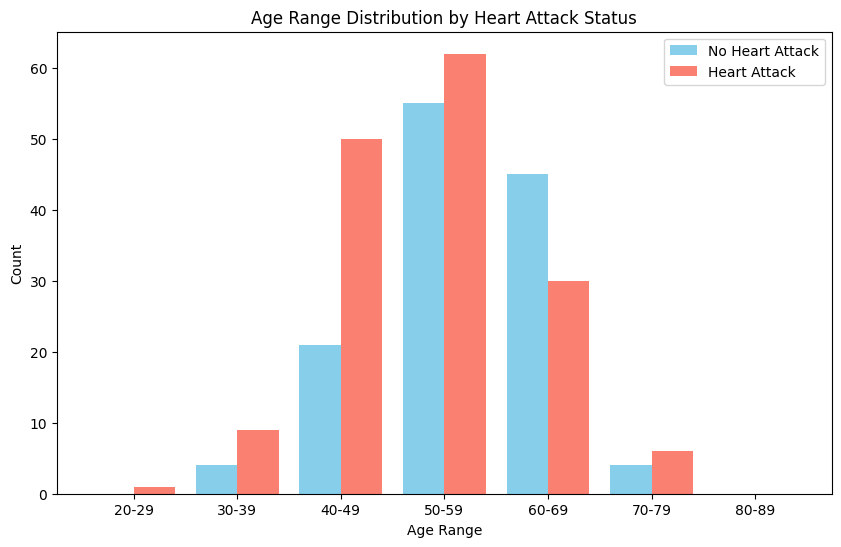

In [430]:
def plot_age_ranges(data_cleaned):

    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    data_cleaned['Age Range'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

    no_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 0]
    heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 1]

    counts_no_heart_attack = no_heart_attack['Age Range'].value_counts().sort_index()
    counts_heart_attack = heart_attack['Age Range'].value_counts().sort_index()

    width = 0.4
    positions_no_heart_attack = np.arange(len(counts_no_heart_attack))
    positions_heart_attack = positions_no_heart_attack + width

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.bar(positions_no_heart_attack, counts_no_heart_attack, width=width, color='skyblue', label='No Heart Attack')
    plt.bar(positions_heart_attack, counts_heart_attack, width=width, color='salmon', label='Heart Attack')
    plt.title('Age Range Distribution by Heart Attack Status')
    plt.xlabel('Age Range')
    plt.ylabel('Count')
    plt.xticks(positions_no_heart_attack + width / 2, age_labels)
    plt.legend()
    plt.show()

plot_age_ranges(data_cleaned)

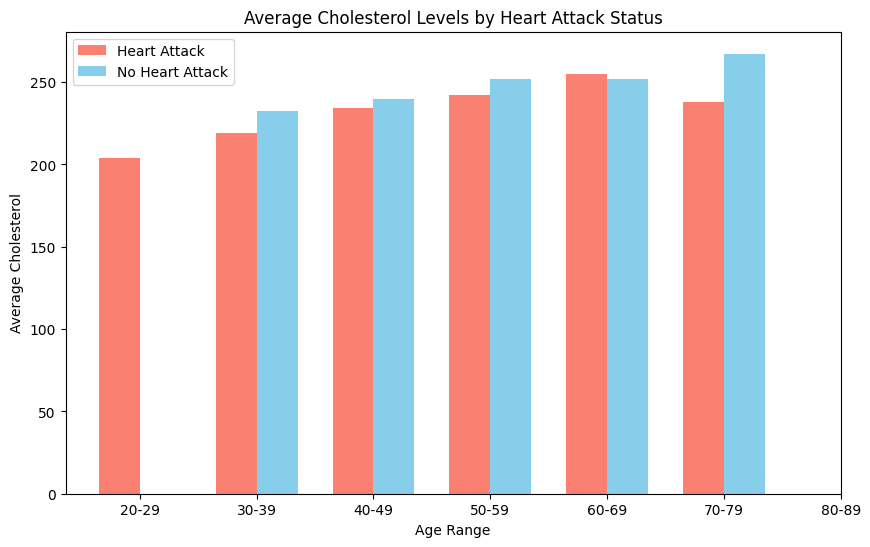

In [431]:
def plot_avg_cholesterol_by_age_range(data_cleaned):

    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    data_cleaned['Age Range'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

    avg_cholesterol_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 1].groupby('Age Range', observed=False)['Chol'].mean()
    avg_cholesterol_no_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 0].groupby('Age Range', observed=False)['Chol'].mean()

    width = 0.35
    positions_heart_attack = np.arange(len(age_labels))
    positions_no_heart_attack = positions_heart_attack + width

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(positions_heart_attack, avg_cholesterol_heart_attack, width=width, color='salmon', label='Heart Attack')
    ax.bar(positions_no_heart_attack, avg_cholesterol_no_heart_attack, width=width, color='skyblue', label='No Heart Attack')
    ax.set_title('Average Cholesterol Levels by Heart Attack Status')
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Average Cholesterol')
    ax.set_xticks(positions_heart_attack + width / 2)
    ax.set_xticklabels(age_labels)
    ax.legend()
    plt.show()

plot_avg_cholesterol_by_age_range(data_cleaned)

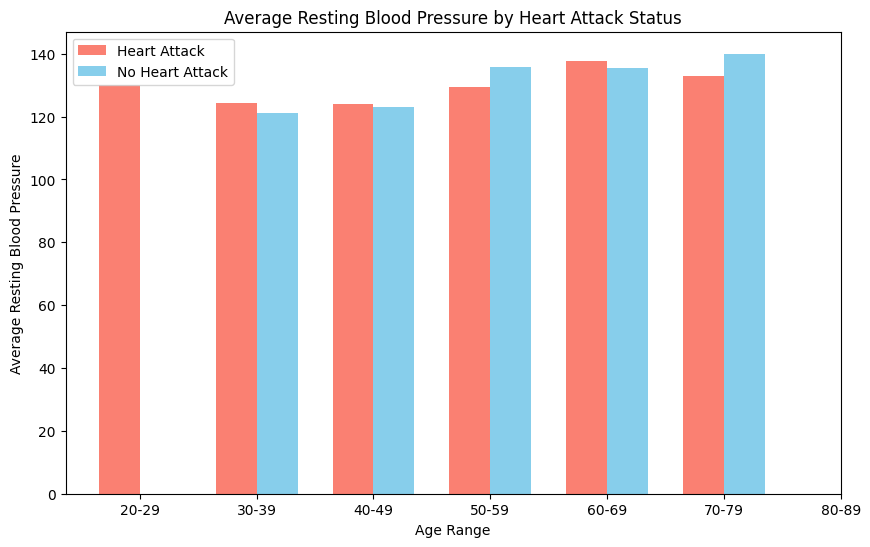

In [432]:
def plot_avg_resting_blood_pressure_by_heart_attack(data_cleaned):

    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    data_cleaned['Age Range'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

    avg_rbp_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 1].groupby('Age Range', observed=False)['RBP'].mean()
    avg_rbp_no_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 0].groupby('Age Range', observed=False)['RBP'].mean()

    width = 0.35
    positions_heart_attack = np.arange(len(age_labels))
    positions_no_heart_attack = positions_heart_attack + width

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(positions_heart_attack, avg_rbp_heart_attack, width=width, color='salmon', label='Heart Attack')
    ax.bar(positions_no_heart_attack, avg_rbp_no_heart_attack, width=width, color='skyblue', label='No Heart Attack')
    ax.set_title('Average Resting Blood Pressure by Heart Attack Status')
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Average Resting Blood Pressure')
    ax.set_xticks(positions_heart_attack + width / 2)
    ax.set_xticklabels(age_labels)
    ax.legend()
    plt.show()

plot_avg_resting_blood_pressure_by_heart_attack(data_cleaned)

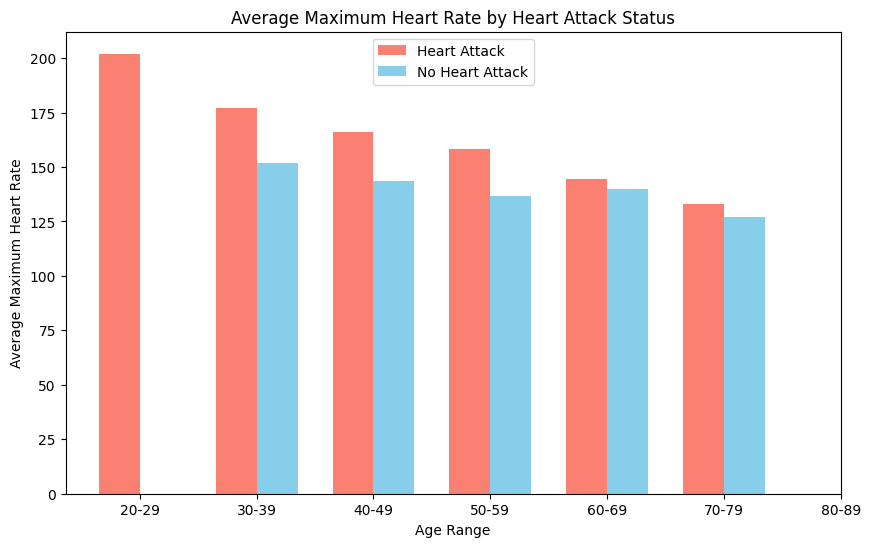

In [433]:
def plot_avg_max_heart_rate_by_heart_attack(data_cleaned):

    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
    data_cleaned['Age Range'] = pd.cut(data_cleaned['Age'], bins=age_bins, labels=age_labels, right=False)

    avg_max_heart_rate_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 1].groupby('Age Range', observed=False)['Max Heart Rate'].mean()
    avg_max_heart_rate_no_heart_attack = data_cleaned[data_cleaned['Heart Attack'] == 0].groupby('Age Range', observed=False)['Max Heart Rate'].mean()

    width = 0.35
    positions_heart_attack = np.arange(len(age_labels))
    positions_no_heart_attack = positions_heart_attack + width

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(positions_heart_attack, avg_max_heart_rate_heart_attack, width=width, color='salmon', label='Heart Attack')
    ax.bar(positions_no_heart_attack, avg_max_heart_rate_no_heart_attack, width=width, color='skyblue', label='No Heart Attack')
    ax.set_title('Average Maximum Heart Rate by Heart Attack Status')
    ax.set_xlabel('Age Range')
    ax.set_ylabel('Average Maximum Heart Rate')
    ax.set_xticks(positions_heart_attack + width / 2)
    ax.set_xticklabels(age_labels)
    ax.legend()
    plt.show()

plot_avg_max_heart_rate_by_heart_attack(data_cleaned)

In [434]:
def generate_mock_person(min_values, max_values):

    mock_person = {
        'Age': np.random.randint(min_values['Age'], max_values['Age'] + 1),
        'Sex': np.random.randint(min_values['Sex'], max_values['Sex'] + 1),
        'Chest Pain': np.random.randint(min_values['Chest Pain'], max_values['Chest Pain'] + 1),
        'RBP': np.random.randint(min_values['RBP'], max_values['RBP'] + 1),
        'Chol': np.random.randint(min_values['Chol'], max_values['Chol'] + 1),
        'FBS': np.random.randint(min_values['FBS'], max_values['FBS'] + 1),
        'RECG': np.random.randint(min_values['RECG'], max_values['RECG'] + 1),
        'Max Heart Rate': np.random.randint(min_values['Max Heart Rate'], max_values['Max Heart Rate'] + 1),
        'EXNG': np.random.randint(min_values['EXNG'], max_values['EXNG'] + 1),
        'Old Peak': np.random.uniform(min_values['Old Peak'], max_values['Old Peak']),
        'Slope': np.random.randint(min_values['Slope'], max_values['Slope'] + 1),
        'CAA': np.random.randint(min_values['CAA'], max_values['CAA'] + 1),
        'Thalium': np.random.randint(min_values['Thalium'], max_values['Thalium'] + 1),
        'Heart Attack': 0 # default Heart Attack to zero
    }

    return mock_person

min_values = data_cleaned.min()
max_values = data_cleaned.max()

mock_person = generate_mock_person(min_values, max_values)
print("Mock New Person:")
print(mock_person)

Mock New Person:
{'Age': 37, 'Sex': 0, 'Chest Pain': 1, 'RBP': 132, 'Chol': 141, 'FBS': 1, 'RECG': 2, 'Max Heart Rate': 152, 'EXNG': 0, 'Old Peak': 1.5676809979280502, 'Slope': 1, 'CAA': 0, 'Thalium': 3, 'Heart Attack': 0}


In [435]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = data_cleaned.drop('Heart Attack', axis=1)
y = data_cleaned['Heart Attack']

numeric_cols = X.select_dtypes(include=np.number).columns
categorical_cols = X.select_dtypes(include='object').columns

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(random_state=42))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict whether the new person has a heart attack
mock_person_data = pd.DataFrame([mock_person]) 
probability = model.predict_proba(mock_person_data)[:, 1]

prediction = model.predict(mock_person_data)
print("Prediction:")
if prediction[0] == 1:
    print("The model predicts that the new person has a heart attack.")
else:
    print("The model predicts that the new person does not have a heart attack.")

print("\nProbability of having a heart attack:")
print(f"{probability[0]:.2%}")

Prediction:
The model predicts that the new person has a heart attack.

Probability of having a heart attack:
90.94%


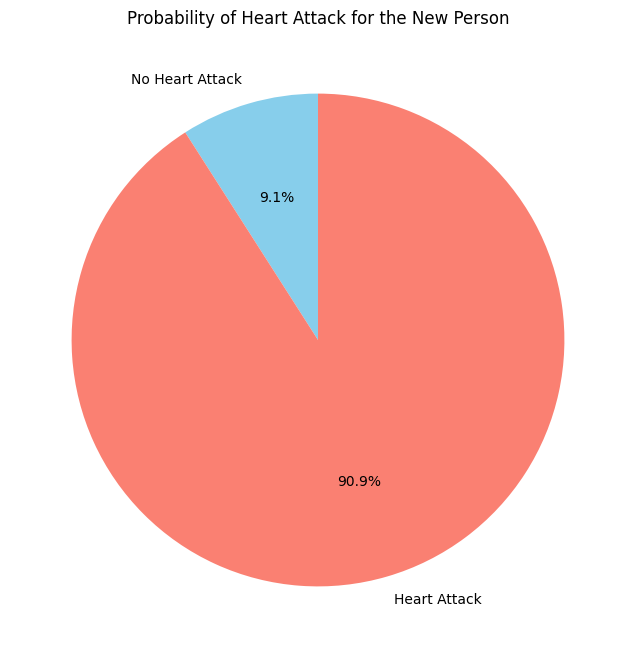

In [436]:
def plot_probability_chart(model, mock_person_data):

    probability = model.predict_proba(mock_person_data)[:, 1]

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie([1 - probability[0], probability[0]], labels=['No Heart Attack', 'Heart Attack'], autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
    ax.set_title('Probability of Heart Attack for the New Person')
    plt.show()

plot_probability_chart(model, mock_person_data)

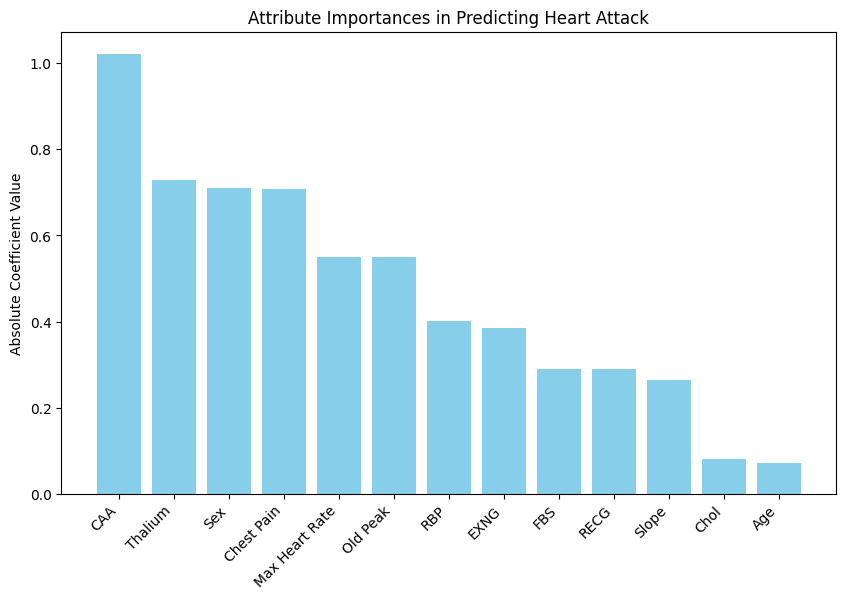

In [437]:
def plot_feature_importance(model, feature_names):

    importances = model.named_steps['classifier'].coef_[0]
    abs_importances = np.abs(importances)

    sorted_indices = np.argsort(abs_importances)[::-1]
    sorted_importances = abs_importances[sorted_indices]
    sorted_features = np.array(feature_names)[sorted_indices]

    fig, ax = plt.subplots(figsize=(10, 6))
    ax.bar(sorted_features, sorted_importances, color='skyblue')
    ax.set_ylabel('Absolute Coefficient Value')
    ax.set_title('Attribute Importances in Predicting Heart Attack')
    plt.xticks(rotation=45, ha='right')
    plt.show()

feature_names = X_train.columns
plot_feature_importance(model, feature_names)

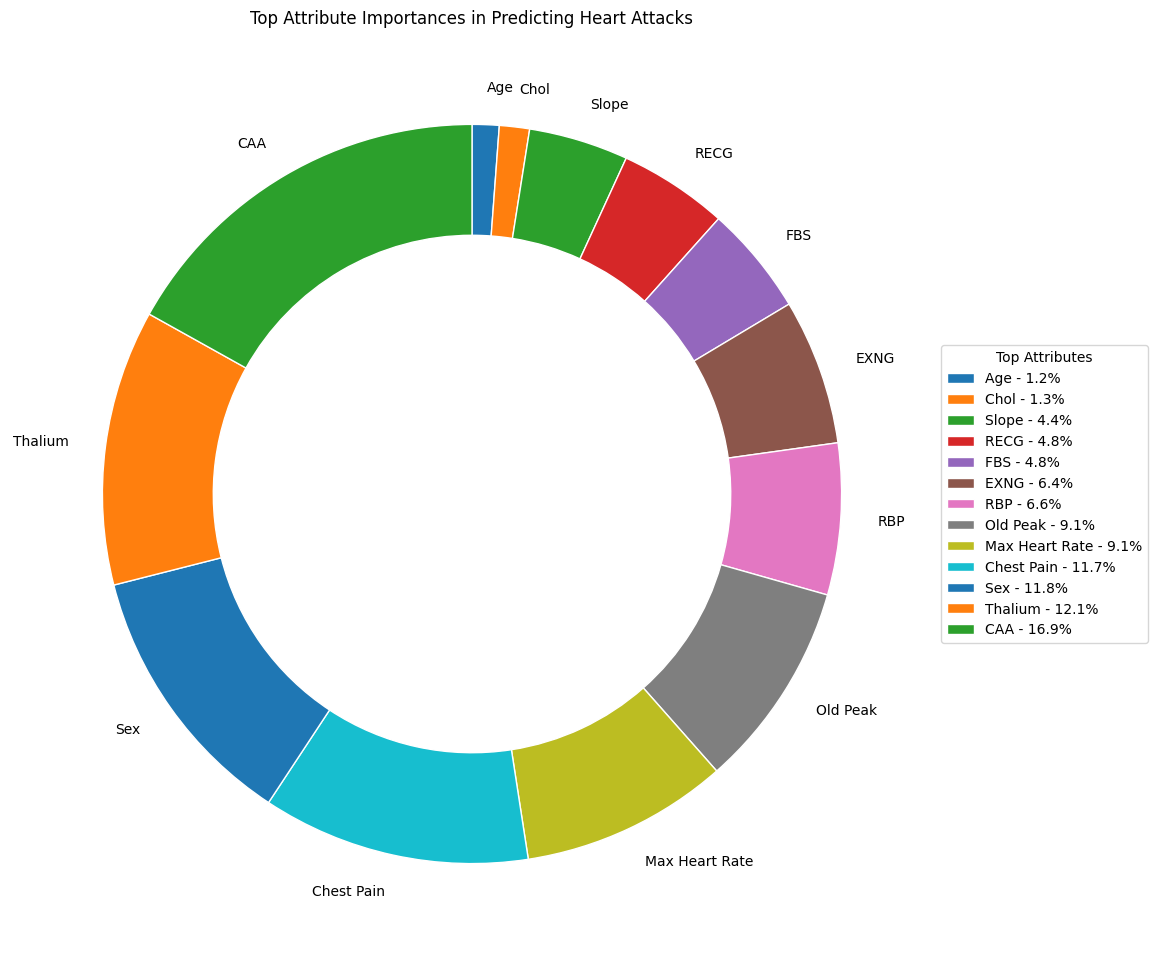

In [438]:
def plot_pie_chart_feature_importance(model, feature_names, top_n=5):

    importances = model.named_steps['classifier'].coef_[0]
    abs_importances = np.abs(importances)
    
    normalized_importances = abs_importances / abs_importances.sum()

    top_indices = np.argsort(normalized_importances)[-top_n:]
    top_features = np.array(feature_names)[top_indices]
    top_importances = normalized_importances[top_indices]

    fig, ax = plt.subplots(figsize=(12, 12))
    wedges, texts, autotexts = ax.pie(top_importances, labels=top_features, autopct='', startangle=90, counterclock=False,
                                     wedgeprops=dict(width=0.3, edgecolor='w'))

    legend_labels = [f'{label} - {percent:.1%}' for label, percent in zip(top_features, top_importances)]
    ax.legend(wedges, legend_labels, title='Top Attributes', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
    ax.set_title('Top Attribute Importances in Predicting Heart Attacks')
    plt.show()
    
plot_pie_chart_feature_importance(model, feature_names, top_n=13)